In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from opqua.model import Model

Host-host transmission model with susceptible and infected hosts in a single
population scenario, illustrating pathogen evolution through independent
reassortment/segregation of chromosomes, increased transmissibility,
and intra-host competition.

When two pathogens with different genomes meet in the same host (or vector),
the pathogen with the most fit genome has a higher probability of being
transmitted to another host (or vector). In this case, the transmission rate
DOES vary according to genome, with more fit genomes having a higher
transmission rate. Once an event occurs, the pathogen with higher fitness also
has a higher likelihood of being transmitted.

Here, we define a landscape of stabilizing selection where there is an optimal
genome and every other genome is less fit, but fitness functions can be defined
in any arbitrary way (accounting for multiple peaks, for instance, or special
cases for a specific genome sequence).

## Model initialization and setup

### Create a new `Model` object

In [2]:
model = Model()

### Define an optimal genome
`/` denotes separators between different chromosomes, which are segregated and recombined independently of each other (this model has no recombination).

In [3]:
my_optimal_genome = 'BEST/BEST/BEST/BEST'

### Define a custom fitness function for the host
Fitness functions must take in 1 argument and return a positive number as a fitness value. Here, we take advantage of one of the preset functions, but you can define it any way you want!

**Stabilizing selection:** any deviation from the "optimal genome" sequence results in an exponential decay in fitness to the `min_fitness` value at the maximum possible distance. Here we use strong selection, with a very low minimum fitness

In [4]:
def myHostFitness(genome):
    return Model.peakLandscape(
        genome, 
            # genome to be evaluated (String)
        peak_genome=my_optimal_genome, 
            # the genome sequence to measure distance against, has value of 1 (String)
        min_value=1e-10
            # minimum value at maximum distance from optimal genome (number > 0)
        )

### Define a custom transmission function for the host
**Stabilizing selection:** any deviation from the "optimal genome" sequence gets 1/20 of the fitness of the optimal genome. There is no middle ground between the optimal and the rest, in this case.

In [5]:
def myHostContact(genome):
    return 1 if genome == my_optimal_genome else 0.05

### Define a Setup for our system

In [6]:
model.newSetup(         # Create a new setup dictionary
    'my_setup', 
        # Name of the setup (a dictionary).
    preset='host-host', 
        # Use default 'host-host' parameters.
    possible_alleles='ABDEST',
        # Define "letters" in the "genome", or possible alleles for each locus.
        # Each locus can have different possible alleles if you define this
        # argument as a list of strings, but here, we take the simplest
        # approach.
    num_loci=len(my_optimal_genome),
        # Define length of "genome", or total number of alleles.
    contact_rate_host_host = 2e0,
        # Rate of host-host contact events, not necessarily transmission, assumes 
        # constant population density; events/time (number >= 0)
    contactHost=myHostContact,
        # Assign the contact function we created (could be a lambda function)
        # Function that returns coefficient modifying probability of a given host 
        # being chosen to be the infector in a contact event, based on genome 
        # sequence of pathogen (function object, takes a String argument and returns 
        # a number 0-1)
    fitnessHost=myHostFitness,
        # Assign the fitness function we created (could be a lambda function)
        # Function that evaluates relative fitness in head-to-head competition for 
        # different genomes within the same host (function object, takes a String 
        # argument and returns a number >= 0)
    recombine_in_host=1e-3,
        # Modify "recombination" rate of pathogens when in host to get some
        # evolution! This can either be independent segregation of chromosomes
        # (equivalent to reassortment), recombination of homologous chromosomes,
        # or a combination of both.
    num_crossover_host=0
        # By specifying the average number of crossover events that happen
        # during recombination to be zero, we ensure that "recombination" is
        # restricted to independent segregation of chromosomes (separated by
        # "/").
    )

### Create a population in our model

Create a new population of 100 hosts and 0 vectors called `my_population`. The population uses parameters stored in `my_setup`

In [7]:
model.newPopulation(        # Create a new Population object with setup parameters
    'my_population',
        # Unique identifier for this population in the model 
    'my_setup',
        # Setup object with parameters for this population
    num_hosts=100
        # Number of hosts to initialize population with
    )

### Manipulate hosts and vectors in the population
We will start off the simulation with a suboptimal pathogen genome, Throughout the course of the simulation, we should see this genome be outcompeted by more optimal pathogen genotypes, culminating in the optimal genome, which outcompetes all others.

In [8]:
model.addPathogensToHosts(
    'my_population',
    {'BEST/BADD/BEST/BADD':10} 
    )

We will start off the simulation with a second suboptimal pathogen genome. Throughout the course of the simulation, we should see this genome be outcompeted by more optimal pathogen genotypes, culminating in the optimal genome, which outcompetes all others.

In [9]:
model.addPathogensToHosts(
    'my_population',
    {'BADD/BEST/BADD/BEST':10} 
    )

## Model simulation

In [10]:
model.run(
    0,
    500,
    time_sampling=100
    )

Simulating time: 500 END


## Output data manipulation and visualization

### Create a table with the results of the given model history

In [11]:
data = model.saveToDataFrame(
    'transmissibility_function_reassortment_example.csv'
    )
data

Saving file...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


...file saved.


[Parallel(n_jobs=8)]: Done   2 out of   2 | elapsed:    0.3s finished


,Time,Population,Organism,ID,Pathogens,Protection,Alive
0,0,my_population,Host,my_population_0,NaN,NaN,True
1,0,my_population,Host,my_population_1,NaN,NaN,True
2,0,my_population,Host,my_population_2,NaN,NaN,True
3,0,my_population,Host,my_population_3,NaN,NaN,True
4,0,my_population,Host,my_population_4,NaN,NaN,True
...,...,...,...,...,...,...,...
195,500,my_population,Host,my_population_95,NaN,NaN,True
196,500,my_population,Host,my_population_96,NaN,NaN,True
197,500,my_population,Host,my_population_97,NaN,NaN,True
198,500,my_population,Host,my_population_98,NaN,NaN,True


### Create a plot to track pathogen genotypes across time

1 / 2 genotypes processed.
2 / 2 genotypes processed.


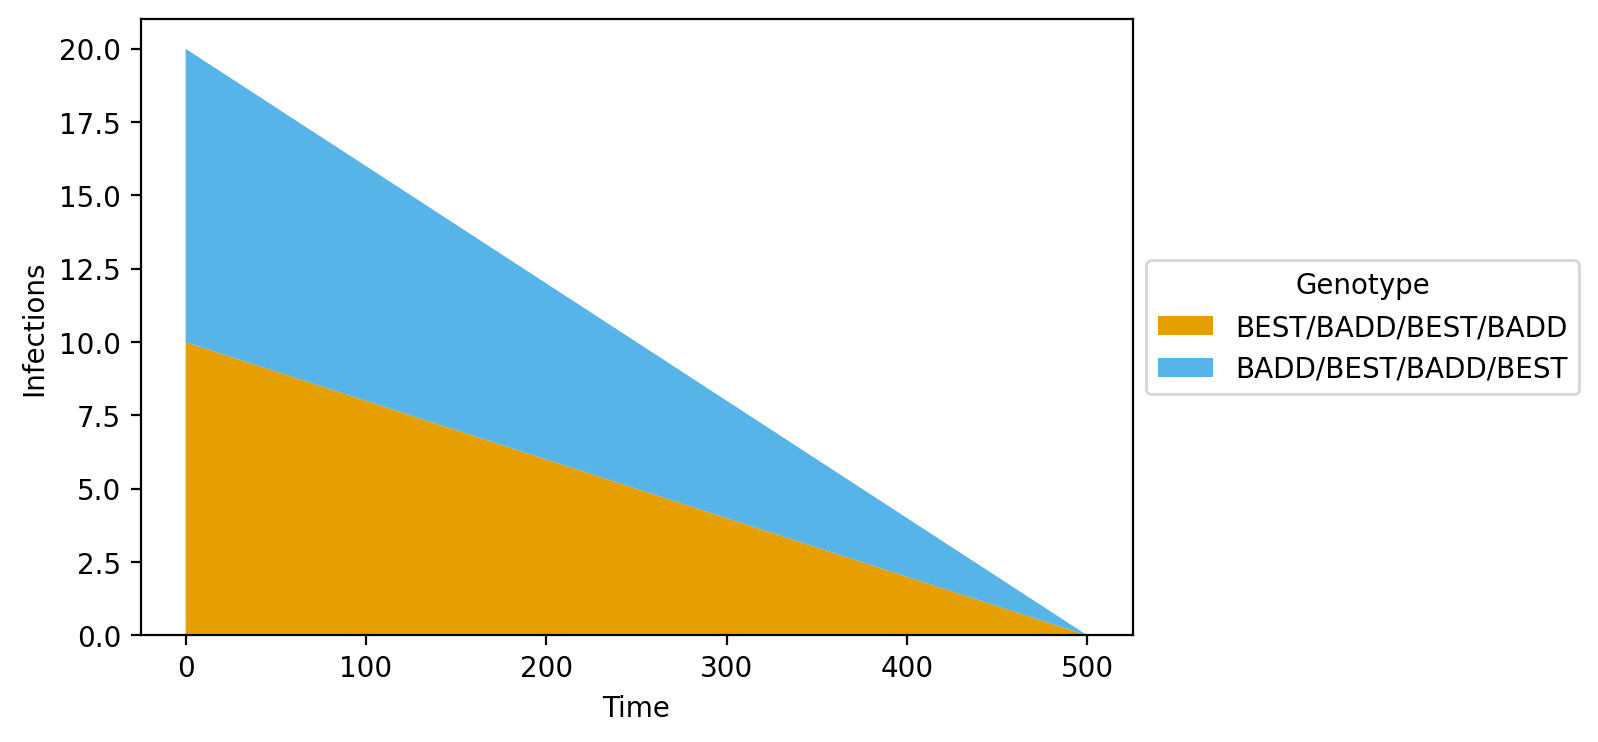

In [12]:
graph_composition = model.compositionPlot(
        # Create a plot to track pathogen genotypes across time.
    'transmissibility_function_reassortment_example_composition.png', 
    data
    )

### Create a heatmap and dendrogram for pathogen genomes 
Generate a heatmap and dendrogram for the top 24 genomes. Besides creating the plot, outputs the pairwise distance matrix to a csv file as well.

/home/acs98/miniconda3/envs/opqua/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


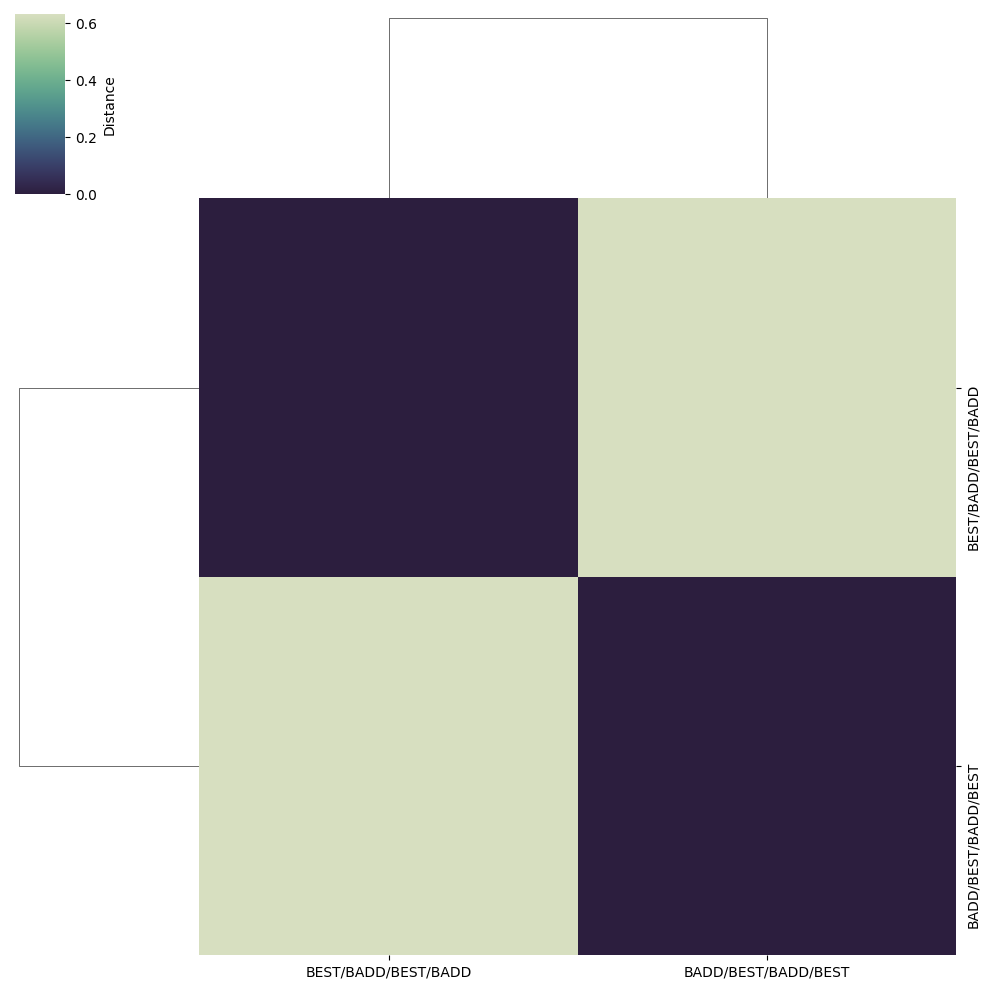

In [13]:
graph_clustermap = model.clustermap(
    'transmissibility_function_reassortment_example_clustermap.png', 
    data,
    save_data_to_file='transmissibility_function_reassortment_example_pairwise_distances.csv',
    num_top_sequences=24
    )

### Create a normal compartment plot
Also generate a normal compartment plot. Notice the total number of infections in the composition plot can exceed the number of infected hosts in the compartment plot. This happens because a single host infected by multiple genotypes is counted twice in the former, but not the latter.

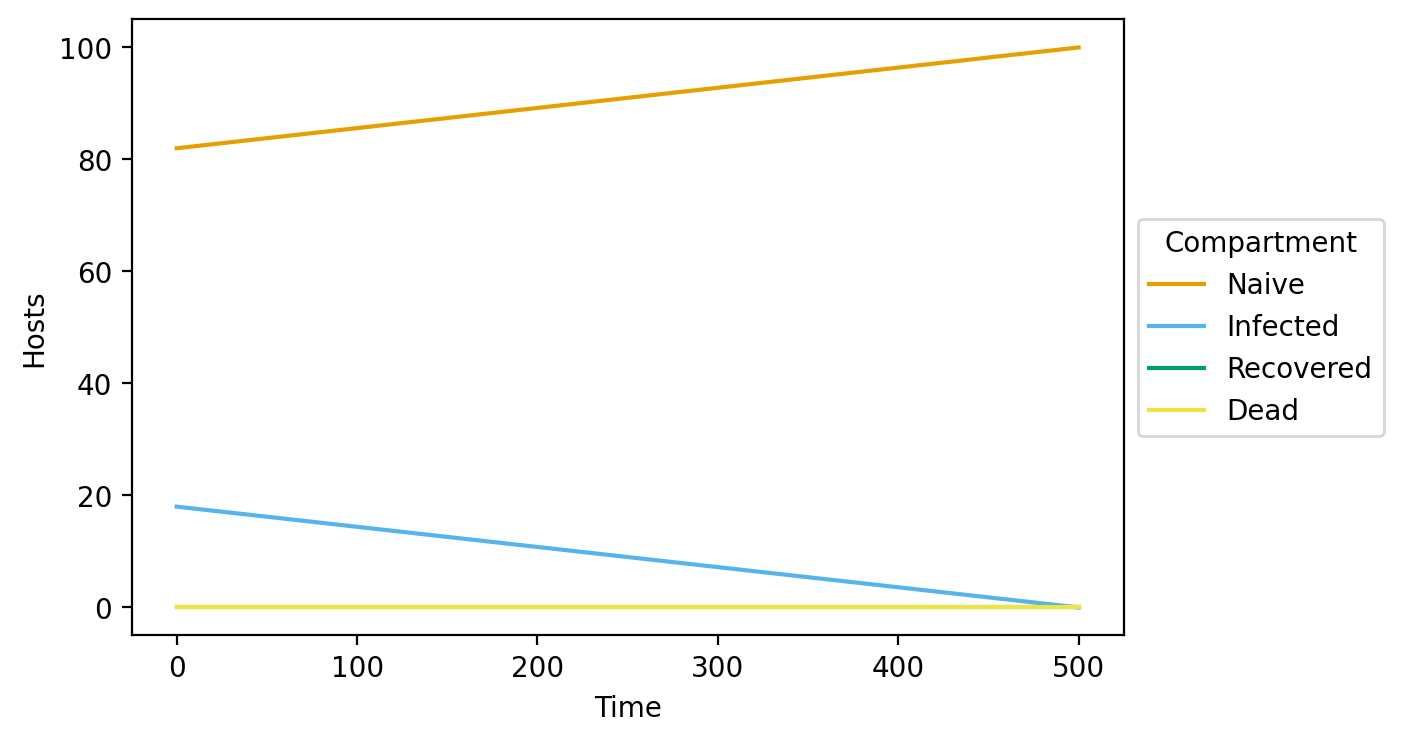

In [14]:
graph_compartments = model.compartmentPlot(
    'transmissibility_function_reassortment_example_compartments.png', 
    data
    )